# <center style="background-color:#63809e; color:white;">Employee Burn Rate Prediction</center>

<center><img src="https://smallville.com.au/wp-content/uploads/2019/12/10-Questions-To-Ask-Yourself-To-Monitor-Your-Mental-HealthAsset-1@4x-100.jpg" ></center>

<br><br>
## <center style="background-color:#6abada; color:white;">About</center>
<div style="text-align: justify;">Understanding what will be the Burn Rate for the employee working in an organization based on the current pandemic situation where work from home is a boon and a bane. How are employees' Burn Rate affected based on various conditions provided? Through this notebook, we are going to understand and observe the mental health of all the employees for a company with the dataset provided. So, we need to predict the burn-out rate of employees based on the provided features thus helping the company to take appropriate measures for their employees' health and keep measures to improve their throughput.</div> 
<br>


<div style="text-align: justify;">Globally, World Mental Health Day is celebrated on <b>October 10</b> each year. The objective of this day is to raise awareness about mental health issues around the world and mobilize efforts in support of mental health. According to an anonymous survey, about <b>450 million</b> people live with mental disorders that can be one of the primary causes of poor health and disability worldwide. These days when the world is suffering from a pandemic situation, it becomes really hard to maintain mental fitness.
 </div>

## <center style="background-color:#6abada; color:white;">Featues in our Data</center>

* `Employee ID`: The unique ID allocated for each employee (example: **fffe390032003000**)
* `Date of Joining`: The date time when the employee has joined the organization (example: **2008-12-30**)
* `Gender`: The gender of the employee (**Male/Female**) 
* `Company Type`: The type of company where the employee is working (**Service/Product**)
* `WFH Setup Available`: Is the work from home facility available for the employee (**Yes/No**)
* `Designation`: The designation of the employee of work in the organization.
    * In the range of **[0.0, 5.0]** bigger is higher designation.
* `Resource Allocation`: The amount of resource allocated to the employee to work, ie. number of working hours. 
    * In the range of **[1.0, 10.0]** (higher means more resource)	
* `Mental Fatigue Score`: The level of fatigue mentally the employee is facing. 
    * In the range of **[0.0, 10.0]** where 0.0 means no fatigue and 10.0 means completely fatigue.
* `Burn Rate`: The value we need to predict for each employee telling the rate of Bur out while working.
    * In the range of **[0.0, 1.0]** where the higher the value is more is the burn out.

# Getting and Understanding Data

## Importing Libraries

In [6]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats 
import scipy.stats as st

# !pip install pandas-profiling
from pandas_profiling import ProfileReport

# !pip install cufflinks
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import os
import re

## Getting Data

In [7]:
import pandas as pd
from pathlib import Path

# Define the file paths using pathlib
data_dir = Path("C:/Users/dell/Downloads/Data Science and Artificial Intelligence Projects/Employee Burn Rate Analysis")
TRAIN_DATA_URL = data_dir / "submission.csv"
TEST_DATA_URL = data_dir / "test.csv"
SAMPLE_DATA_URL = data_dir / "sample_submission.csv"

# Load the data into DataFrames
df = pd.read_csv(TRAIN_DATA_URL)
df_test = pd.read_csv(TEST_DATA_URL)

# Print the shape of the training data
print("Training data shape:", df.shape)

# Display the last few rows of the training data
print("Last few rows of training data:")
print(df.tail())

# Print the shape of the testing data
print("Testing data shape:", df_test.shape)

# Display the last few rows of the testing data
print("Last few rows of testing data:")
print(df_test.tail())

Training data shape: (3534, 2)
Last few rows of training data:
          textID                                      selected_text
3529  e5f0e6ef4b                                              tired
3530  416863ce47                                             Thanks
3531  6332da480c   I know what you mean. My little dog is sinkin...
3532  df1baec676                                I love your videos!
3533  469e15c5a8                                               cute
Testing data shape: (12250, 8)
Last few rows of testing data:
                    Employee ID Date of Joining  Gender Company Type  \
12245      fffe3900310034003700      2008-10-02  Female      Service   
12246  fffe32003600330034003000      2008-03-31  Female      Product   
12247  fffe31003800340039003000      2008-02-12    Male      Service   
12248  fffe32003600380031003800      2008-02-06    Male      Service   
12249  fffe32003100390037003800      2008-08-05  Female      Product   

      WFH Setup Available  Designa

## Profiling Data 

In [8]:
profile = ProfileReport(df, title='Pandas Profiling Report')
profile.to_file("./BurnOut_Profiling.html")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
import pandas as pd
import cufflinks as cf

# assuming df is your DataFrame
num_cols = ["Designation", "Resource Allocation", "Mental Fatigue Score", "Burn Rate"]

# create a figure with multiple subplots
fig = df[num_cols].iplot(kind='scatter', subplots=True, title='Scatter plots of numerical columns')

# show the plot
cf.show(fig)

KeyError: "None of [Index(['Designation', 'Resource Allocation', 'Mental Fatigue Score',\n       'Burn Rate'],\n      dtype='object')] are in the [columns]"

## Understanding Data

In [ ]:
df.describe()

Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  22750.000000         21369.000000          20633.000000  21626.000000
mean       2.178725             4.481398              5.728188      0.452005
std        1.135145             2.047211              1.920839      0.198226
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.600000      0.310000
50%        2.000000             4.000000              5.900000      0.450000
75%        3.000000             6.000000              7.100000      0.590000
max        5.000000            10.000000             10.000000      1.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


## Dealing with missing values

In [ ]:
df.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
df.dropna(subset = ["Burn Rate"], inplace=True)
print(df.shape)

(21626, 9)


In [ ]:
df = df.fillna(df.median())
print("Are there any value missing now? "+str(df.isna().any().any()))

Are there any value missing now? False


In [ ]:
print("Numerical valued features counts:----------", end="\n\n")

print(df["Designation"].value_counts(), end="\n\n")
print(df["Resource Allocation"].value_counts(), end="\n\n")
print(df["Mental Fatigue Score"].value_counts(), end="\n\n")

Numerical valued features counts:----------

2.0    7206
3.0    5698
1.0    4632
4.0    2275
0.0    1439
5.0     376
Name: Designation, dtype: int64

4.0     4972
5.0     3670
3.0     3028
6.0     2817
2.0     1988
7.0     1880
1.0     1701
8.0      992
9.0      428
10.0     150
Name: Resource Allocation, dtype: int64

5.9    2384
6.0     451
5.8     436
6.3     432
6.5     426
       ... 
0.6      22
0.2      22
0.4      16
0.1      15
0.3      11
Name: Mental Fatigue Score, Length: 101, dtype: int64



# Exploratory Data Analysis

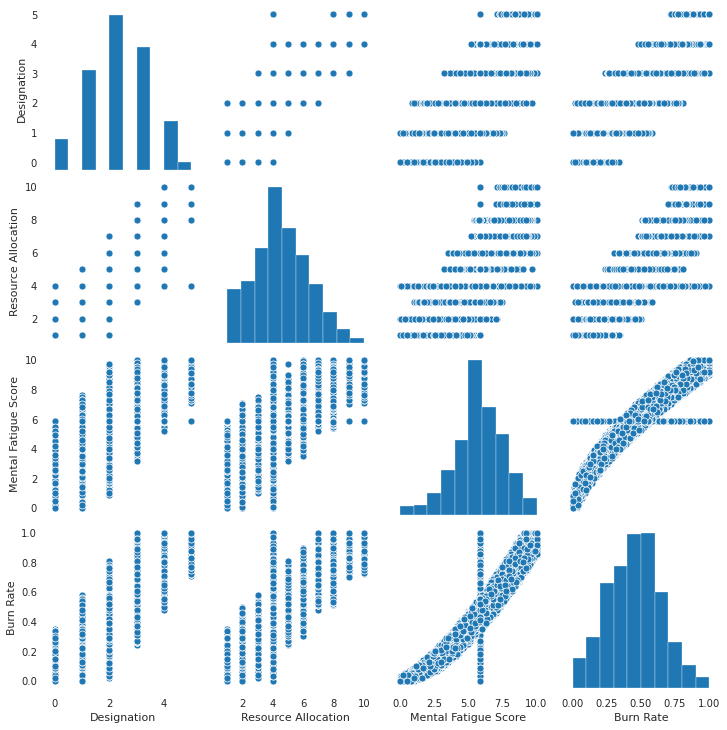

In [ ]:
sns_plot = sns.pairplot(df, height=2.5)
sns_plot.savefig("pairplot.png")

## Checking Data Normality

In [ ]:
def normalize_features(original_data):
    fitted_data, fitted_lambda = stats.boxcox(original_data) 
    fig, ax = plt.subplots(1, 2) 

    # plotting the original data(non-normal) and  
    # fitted data (normal) 
    sns.distplot(original_data, hist = False, kde = True, 
                kde_kws = {'shade': True, 'linewidth': 2},  
                label = "Non-Normal", color ="green", ax = ax[0]) 

    sns.distplot(fitted_data, hist = False, kde = True, 
                kde_kws = {'shade': True, 'linewidth': 2},  
                label = "Normal", color ="green", ax = ax[1]) 

    # adding legends to the subplots 
    plt.legend(loc = "upper right") 

    # rescaling the subplots 
    fig.set_figheight(5) 
    fig.set_figwidth(10)
    return fitted_data

array([3.47389382, 5.23694318, 6.47713233, ..., 6.63544442, 6.63544442,
       9.76745606])

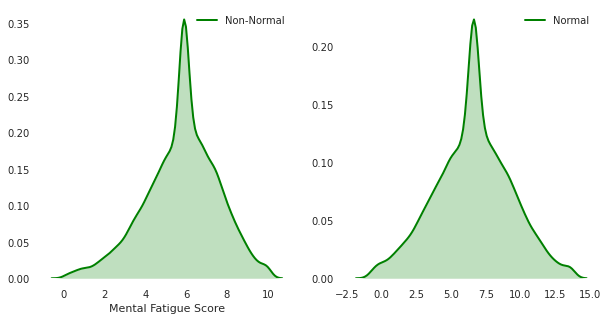

In [ ]:
original_data = df.drop(df[df["Mental Fatigue Score"] <= 0.0].index)["Mental Fatigue Score"]
normalize_features(original_data)

array([0.80864742, 0.        , 0.80864742, ..., 1.40748329, 0.80864742,
       1.40748329])

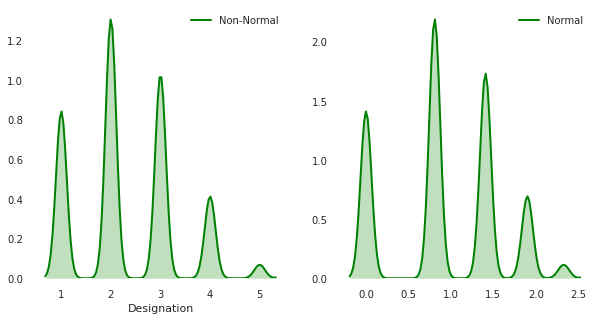

In [ ]:
original_data = df.drop(df[df["Designation"] <= 0.0].index)["Designation"]
normalize_features(original_data)

array([1.67647646, 0.89952171, 2.38320075, ..., 4.25917477, 3.04190815,
       3.66471678])

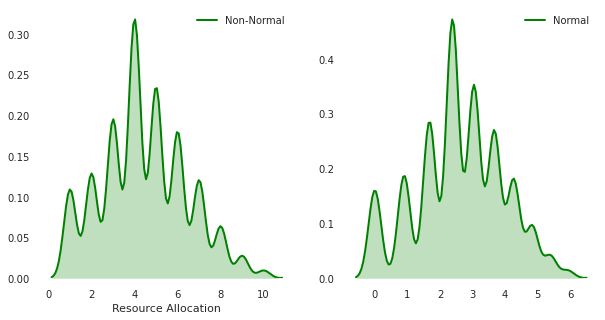

In [ ]:
original_data = df.drop(df[df["Resource Allocation"] <= 0.0].index)["Resource Allocation"]
normalize_features(original_data)

array([-0.93445617, -0.68549774, -0.5364433 , ..., -0.28703148,
       -0.5029999 , -0.4044282 ])

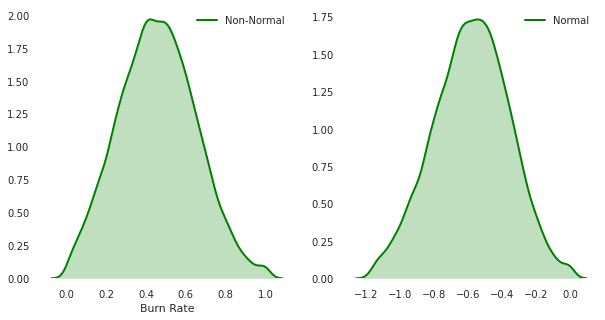

In [ ]:
original_data = df.drop(df[df["Burn Rate"] <= 0.0].index)["Burn Rate"]
normalize_features(original_data)

# Feature Engineering

## Categorize features

In [ ]:
def categorize_designation(data):
    if data["Designation"] <= 1.0:
        return 0
    if data["Designation"] > 1.0 and data["Designation"] <= 2.0:
        return 1
    if data["Designation"] > 2.0 and data["Designation"] <= 5.0:
        return 2
    return -1


def categorize_resource(data):
    if data["Resource Allocation"] <= 3.0:
        return 0
    if data["Resource Allocation"] > 3.0 and data["Resource Allocation"] <= 5.0:
        return 1
    if data["Resource Allocation"] > 5.0 and data["Resource Allocation"] <= 10.0:
        return 2
    return -1
    

def categorize_Mental_Fatigue(data):
    if data["Mental Fatigue Score"] <= 4.0:
        return 0
    if data["Mental Fatigue Score"] > 4.0 and data["Mental Fatigue Score"] <= 5.0:
        return 1
    if data["Mental Fatigue Score"] > 5.0 and data["Mental Fatigue Score"] <= 6.0:
        return 2
    if data["Mental Fatigue Score"] > 6.0 and data["Mental Fatigue Score"] <= 7.0:
        return 3
    if data["Mental Fatigue Score"] > 7.0:
        return 4
    return -1



df["categorize_designation"] = df.apply(categorize_designation, axis=1)
df["categorize_resource"] = df.apply(categorize_resource, axis=1)
df["categorize_Mental_Fatigue"] = df.apply(categorize_Mental_Fatigue, axis=1)

df_test["categorize_designation"] = df_test.apply(categorize_designation, axis=1)
df_test["categorize_resource"] = df_test.apply(categorize_resource, axis=1)
df_test["categorize_Mental_Fatigue"] = df_test.apply(categorize_Mental_Fatigue, axis=1)

In [ ]:
print("Cetegorized valued features values:----------", end="\n\n")

print(df["categorize_designation"].value_counts(), end="\n\n")
print(df["categorize_resource"].value_counts(), end="\n\n")
print(df["categorize_Mental_Fatigue"].value_counts(), end="\n\n")

Cetegorized valued features values:----------

2    8349
1    7206
0    6071
Name: categorize_designation, dtype: int64

1    8642
0    6717
2    6267
Name: categorize_resource, dtype: int64

2    6008
4    5003
3    4039
0    3571
1    3005
Name: categorize_Mental_Fatigue, dtype: int64



## Date of Joining

In [ ]:
current_date = pd.to_datetime('today')

df["Date of Joining"] = pd.to_datetime(df["Date of Joining"])
df_test["Date of Joining"] = pd.to_datetime(df_test["Date of Joining"])

In [ ]:
def create_days_count(data):
    return (current_date - data["Date of Joining"])

df["days_count"] = df.apply(create_days_count, axis=1)
df["days_count"] = df["days_count"].dt.days

df_test["days_count"] = df_test.apply(create_days_count, axis=1)
df_test["days_count"] = df_test["days_count"].dt.days

## Encoding Features

In [ ]:
print(df["Gender"].value_counts(), end="\n\n")
print(df["Company Type"].value_counts(), end="\n\n")
print(df["WFH Setup Available"].value_counts(), end="\n\n")

Female    11349
Male      10277
Name: Gender, dtype: int64

Service    14124
Product     7502
Name: Company Type, dtype: int64

Yes    11685
No      9941
Name: WFH Setup Available, dtype: int64



In [ ]:
one = 1
zero = 0

def gender_encoder(data):
    if data["Gender"] == "Female":
        return one
    return zero


def wfh_setup_encoder(data):
    if data["WFH Setup Available"] == "Yes":
        return one
    return zero


def company_encoder(data):
    if data["Company Type"] == "Service":
        return one
    return zero



df["Gender"] = df.apply(gender_encoder, axis=1)
df["WFH Setup Available"] = df.apply(wfh_setup_encoder, axis=1)
df["Company Type"] = df.apply(company_encoder, axis=1)

df_test["Gender"] = df_test.apply(gender_encoder, axis=1)
df_test["WFH Setup Available"] = df_test.apply(wfh_setup_encoder, axis=1)
df_test["Company Type"] = df_test.apply(company_encoder, axis=1)

## Normalize Data

In [ ]:
norm_cols = ["Designation", "Resource Allocation", "Mental Fatigue Score"]
#              + ["days_count", "categorize_designation", "categorize_resource", "categorize_Mental_Fatigue"]

train_df_min = df[norm_cols].min()
train_df_max = df[norm_cols].max()

df[norm_cols] = (df[norm_cols] - train_df_min)/(train_df_max - train_df_min)
df_test[norm_cols] = (df_test[norm_cols] - train_df_min)/(train_df_max - train_df_min)

In [ ]:
df.head()

Employee ID Date of Joining  Gender  Company Type  \
0  fffe32003000360033003200      2008-09-30       1             1   
1      fffe3700360033003500      2008-11-30       0             1   
2  fffe31003300320037003900      2008-03-10       1             0   
3  fffe32003400380032003900      2008-11-03       0             1   
4  fffe31003900340031003600      2008-07-24       1             1   

   WFH Setup Available  Designation  Resource Allocation  \
0                    0          0.4             0.222222   
1                    1          0.2             0.111111   
2                    1          0.4             0.333333   
3                    1          0.2             0.000000   
4                    0          0.6             0.666667   

   Mental Fatigue Score  Burn Rate  categorize_designation  \
0                  0.38       0.16                       1   
1                  0.50       0.36                       0   
2                  0.58       0.49                       1   
3                  0.26       0.20                       0   
4                  0.69       0.52                       2   

   categorize_resource  categorize_Mental_Fatigue  days_count  
0                    0                          0        4418  
1                    0                          1        4357  
2                    1                          2        4622  
3                    0                          0        4384  
4                    2                          3        4486

## Removing useless columns

In [ ]:
df.drop(['Date of Joining', "Employee ID"], axis=1, inplace=True)
clean_df_test = df_test.drop(['Date of Joining', "Employee ID"], axis=1)

# Understand Correlation

In [ ]:
df.corr()

Gender  Company Type  WFH Setup Available  \
Gender                     1.000000      0.011660             0.073740   
Company Type               0.011660      1.000000             0.003410   
WFH Setup Available        0.073740      0.003410             1.000000   
Designation               -0.111794      0.006597            -0.230274   
Resource Allocation       -0.136407      0.007235            -0.276793   
Mental Fatigue Score      -0.139104      0.002631            -0.263712   
Burn Rate                 -0.154895      0.004281            -0.306266   
categorize_designation    -0.105598      0.002307            -0.219409   
categorize_resource       -0.137697      0.003750            -0.279806   
categorize_Mental_Fatigue -0.148512      0.003416            -0.280974   
days_count                 0.000055     -0.001879             0.002770   

                           Designation  Resource Allocation  \
Gender                       -0.111794            -0.136407   
Company Type                  0.006597             0.007235   
WFH Setup Available          -0.230274            -0.276793   
Designation                   1.000000             0.851383   
Resource Allocation           0.851383             1.000000   
Mental Fatigue Score          0.657882             0.740061   
Burn Rate                     0.737556             0.829632   
categorize_designation        0.929387             0.788810   
categorize_resource           0.779459             0.917816   
categorize_Mental_Fatigue     0.626346             0.710272   
days_count                    0.000347             0.000720   

                           Mental Fatigue Score  Burn Rate  \
Gender                                -0.139104  -0.154895   
Company Type                           0.002631   0.004281   
WFH Setup Available                   -0.263712  -0.306266   
Designation                            0.657882   0.737556   
Resource Allocation                    0.740061   0.829632   
Mental Fatigue Score                   1.000000   0.898926   
Burn Rate                              0.898926   1.000000   
categorize_designation                 0.600493   0.667849   
categorize_resource                    0.675305   0.756729   
categorize_Mental_Fatigue              0.934695   0.851230   
days_count                            -0.000803   0.001358   

                           categorize_designation  categorize_resource  \
Gender                                  -0.105598            -0.137697   
Company Type                             0.002307             0.003750   
WFH Setup Available                     -0.219409            -0.279806   
Designation                              0.929387             0.779459   
Resource Allocation                      0.788810             0.917816   
Mental Fatigue Score                     0.600493             0.675305   
Burn Rate                                0.667849             0.756729   
categorize_designation                   1.000000             0.780849   
categorize_resource                      0.780849             1.000000   
categorize_Mental_Fatigue                0.590560             0.679648   
days_count                              -0.001638            -0.004625   

                           categorize_Mental_Fatigue  days_count  
Gender                                     -0.148512    0.000055  
Company Type                                0.003416   -0.001879  
WFH Setup Available                        -0.280974    0.002770  
Designation                                 0.626346    0.000347  
Resource Allocation                         0.710272    0.000720  
Mental Fatigue Score                        0.934695   -0.000803  
Burn Rate                                   0.851230    0.001358  
categorize_designation                      0.590560   -0.001638  
categorize_resource                         0.679648   -0.004625  
categorize_Mental_Fatigue                   1.000000   -0.003500  
days_count  

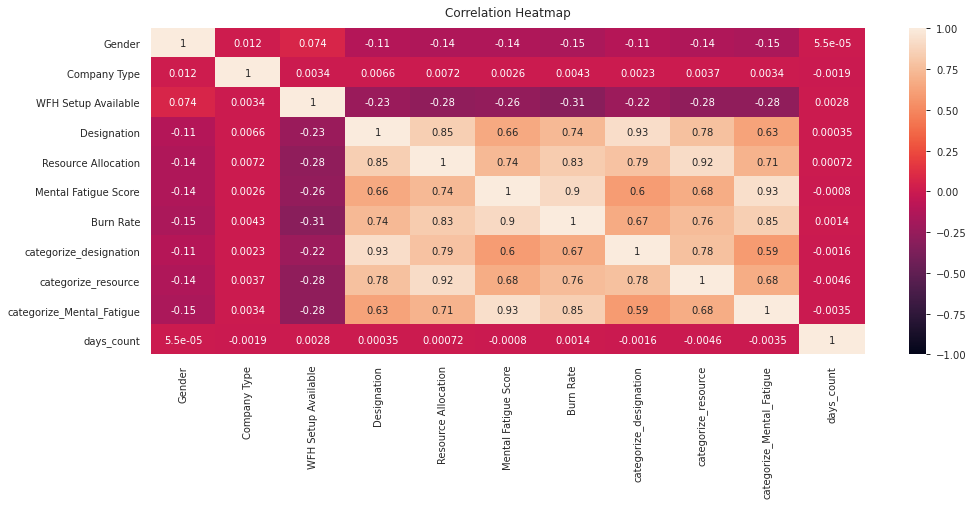

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig("correlation_heatmap.png")

In [ ]:
# df = df.loc[:, ["WFH Setup Available", "Designation", "Resource Allocation", "Mental Fatigue Score", "Burn Rate"]]
# clean_df_test = df_test.loc[:, ["WFH Setup Available", "Designation", "Resource Allocation", "Mental Fatigue Score"]]

## Working with clean data

In [ ]:
clean_df = df.copy()

df.to_csv("clean_df_train.csv", index=False)
train_file_path = "./clean_df_train.csv"
new_df = pd.read_csv(train_file_path)

clean_df_test.to_csv("clean_df_test.csv", index=False)
test_file_path = "./clean_df_test.csv"
new_df_test = pd.read_csv(test_file_path)

new_df_test.head()

Gender  Company Type  WFH Setup Available  Designation  \
0       1             1                    0          0.4   
1       1             0                    1          0.2   
2       0             0                    1          0.2   
3       1             1                    0          0.6   
4       1             0                    0          0.4   

   Resource Allocation  Mental Fatigue Score  categorize_designation  \
0             0.444444                  0.77                       1   
1             0.111111                  0.52                       0   
2             0.222222                  0.59                       0   
3             0.555556                  0.46                       2   
4             0.444444                  0.64                       1   

   categorize_resource  categorize_Mental_Fatigue  days_count  
0                    1                          4        4347  
1                    0                          2        4465  
2                    0                          2        4374  
3                    2                          1        4654  
4                    1                          3        4493

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_df.loc[:, clean_df.columns != "Burn Rate"],
                                                    clean_df.loc[:, clean_df.columns == "Burn Rate"],
                                                    test_size=0.2, 
                                                    random_state=42)

# Model Training and Predicitons

<center><img src="https://media.giphy.com/media/JstFYY8FwlBm48n7De/giphy.gif" width=70%></center>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RandomizedSearchCV

import xgboost


from sklearn.metrics import r2_score

In [ ]:
def print_r2_score(y_train, train_pred, y_test, test_pred):
    r2_train = r2_score(y_train, train_pred)
    print("Score LR Train: "+str(round(100*r2_train, 4))+" %")

    r2_test = r2_score(y_test, test_pred)
    print("Score LR Test: "+str(round(100*r2_test, 4))+" %")

In [ ]:
sub = pd.read_csv(TEST_DATA_URL)
sub = sub.loc[:, ["Employee ID"]]

## Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

train_pred_linear = lr_model.predict(X_train)
test_pred_linear = lr_model.predict(X_test)
print_r2_score(y_train, train_pred_linear, y_test, test_pred_linear)

lr_main_pred = lr_model.predict(clean_df_test)

sub["Burn Rate"] = lr_main_pred
sub.to_csv('submission_lr.csv', index=False)

Score LR Train: 87.2148 %
Score LR Test: 86.8536 %


## Ridge

In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

train_pred_ridge = ridge_model.predict(X_train)
test_pred_ridge = ridge_model.predict(X_test)
print_r2_score(y_train, train_pred_ridge, y_test, test_pred_ridge)

ridge_main_pred = ridge_model.predict(clean_df_test)

sub["Burn Rate"] = ridge_main_pred
sub.to_csv('submission_lasso.csv', index=False)

Score LR Train: 87.214 %
Score LR Test: 86.8545 %


## Lasso

In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

train_pred_lasso = lasso_model.predict(X_train)
test_pred_lasso = lasso_model.predict(X_test)
print_r2_score(y_train, train_pred_lasso, y_test, test_pred_lasso)

lasso_main_pred = lasso_model.predict(clean_df_test)

sub["Burn Rate"] = ridge_main_pred
sub.to_csv('submission_ridge.csv', index=False)

Score LR Train: 59.1703 %
Score LR Test: 59.1271 %


## Elastic net

In [ ]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

train_pred_elastic = elastic_model.predict(X_train)
test_pred_elastic = elastic_model.predict(X_test)
print_r2_score(y_train, train_pred_elastic, y_test, test_pred_elastic)

elastic_main_pred = elastic_model.predict(clean_df_test)

sub["Burn Rate"] = elastic_main_pred
sub.to_csv('submission_elastic.csv', index=False)

Score LR Train: 0.0 %
Score LR Test: -0.0005 %


## SVR

In [ ]:
svr_model = SVR(C=1, gamma=1e-6)
svr_model.fit(X_train, y_train)

train_pred_svr = svr_model.predict(X_train)
test_pred_svr = svr_model.predict(X_test)
print_r2_score(y_train, train_pred_svr, y_test, test_pred_svr)

svr_main_pred = svr_model.predict(clean_df_test)

sub["Burn Rate"] = svr_main_pred
sub.to_csv('submission_svr.csv', index=False)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Score LR Train: 38.0987 %
Score LR Test: 38.2302 %


## Random Forest Regression

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

train_pred_rf = rf_model.predict(X_train)
test_pred_rf = rf_model.predict(X_test)
print_r2_score(y_train, train_pred_rf, y_test, test_pred_rf)

rf_main_pred = rf_model.predict(clean_df_test)

sub["Burn Rate"] = rf_main_pred
sub.to_csv('submission_rf.csv', index=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Score LR Train: 98.4127 %
Score LR Test: 88.9824 %


## XGB (with tuning)

In [ ]:
params = {  
    "n_estimators": range(1, 500, 50),
    "max_depth": range(1, 20, 2),
    "learning_rate": st.uniform(0.1, 0.9)     
}

xgbreg = xgboost.XGBRegressor(nthread=-1, objective='reg:squarederror', seed=42)  
gs = RandomizedSearchCV(xgbreg,params,n_jobs=-1, n_iter=15, cv=10, verbose=3, random_state=42)  
gs.fit(X_train, y_train) 
rf_best_params = gs.best_params_
print(rf_best_params, end="\n\n")

lr_main_pred = gs.predict(clean_df_test)

# /////////////////////////////////////////////////////////////////////////////
xgb_model = xgboost.XGBRegressor(
    n_estimators=rf_best_params["n_estimators"] , 
    max_depth=rf_best_params["max_depth"] , 
    learning_rate=rf_best_params["learning_rate"])

xgb_model.fit(X_train, y_train)

train_pred_xgb = xgb_model.predict(X_train)
test_pred_xgb = xgb_model.predict(X_test)
print_r2_score(y_train, train_pred_xgb, y_test, test_pred_xgb)

xgb_main_pred = xgb_model.predict(clean_df_test)
 
sub["Burn Rate"] = lr_main_pred
sub.to_csv('submission_xgb.csv', index=False)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   30.8s
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.6min finished


{'learning_rate': 0.1185260448662222, 'max_depth': 3, 'n_estimators': 351}

Score LR Train: 91.2261 %
Score LR Test: 90.4594 %


## AdaBoostRegressor

In [ ]:
abr_model = AdaBoostRegressor() 
abr_model.fit(X_train, y_train)

train_pred_abr = abr_model.predict(X_train)
test_pred_abr = abr_model.predict(X_test)
print_r2_score(y_train, train_pred_abr, y_test, test_pred_abr)

abr_main_pred = abr_model.predict(clean_df_test)

sub["Burn Rate"] = abr_main_pred
sub.to_csv('submission_abr.csv', index=False)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Score LR Train: 83.6158 %
Score LR Test: 83.2616 %


## CatBoostRegressor

In [ ]:
cat_model = CatBoostRegressor()
cat_model.fit(X_train, y_train)

train_pred_cat = cat_model.predict(X_train)
test_pred_cat = cat_model.predict(X_test)
print_r2_score(y_train, train_pred_cat, y_test, test_pred_cat)

cat_main_pred = cat_model.predict(clean_df_test)

sub["Burn Rate"] = cat_main_pred
sub.to_csv('submission_cat.csv', index=False)

Learning rate set to 0.06483
0:	learn: 0.1885355	total: 60.9ms	remaining: 1m
1:	learn: 0.1788235	total: 65.2ms	remaining: 32.5s
2:	learn: 0.1699793	total: 69.6ms	remaining: 23.1s
3:	learn: 0.1616412	total: 73.3ms	remaining: 18.3s
4:	learn: 0.1541282	total: 77ms	remaining: 15.3s
5:	learn: 0.1469781	total: 80.6ms	remaining: 13.4s
6:	learn: 0.1403009	total: 84.7ms	remaining: 12s
7:	learn: 0.1341102	total: 88.4ms	remaining: 11s
8:	learn: 0.1284236	total: 92.1ms	remaining: 10.1s
9:	learn: 0.1231055	total: 95.6ms	remaining: 9.47s
10:	learn: 0.1182178	total: 99.2ms	remaining: 8.92s
11:	learn: 0.1135325	total: 103ms	remaining: 8.45s
12:	learn: 0.1094151	total: 106ms	remaining: 8.07s
13:	learn: 0.1055419	total: 110ms	remaining: 7.77s
14:	learn: 0.1019126	total: 114ms	remaining: 7.47s
15:	learn: 0.0986469	total: 117ms	remaining: 7.22s
16:	learn: 0.0956444	total: 121ms	remaining: 7.01s
17:	learn: 0.0928277	total: 126ms	remaining: 6.85s
18:	learn: 0.0902195	total: 130ms	remaining: 6.69s
19:	learn:

## GradientBoostingRegressor

In [ ]:
gbr_model = GradientBoostingRegressor() 
gbr_model.fit(X_train, y_train)

train_pred_gbr = gbr_model.predict(X_train)
test_pred_gbr = gbr_model.predict(X_test)
print_r2_score(y_train, train_pred_gbr, y_test, test_pred_gbr)

gbr_main_pred = gbr_model.predict(clean_df_test)

sub["Burn Rate"] = gbr_main_pred
sub.to_csv('submission_gbr.csv', index=False)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Score LR Train: 90.4061 %
Score LR Test: 89.8992 %


## MLPRegressor

In [ ]:
mlp_model = MLPRegressor(random_state=42) 
mlp_model.fit(X_train, y_train)

train_pred_mlp = mlp_model.predict(X_train)
test_pred_mlp = mlp_model.predict(X_test)
print_r2_score(y_train, train_pred_mlp, y_test, test_pred_mlp)

mlp_main_pred = mlp_model.predict(clean_df_test)

sub["Burn Rate"] = mlp_main_pred
sub.to_csv('submission_mlp.csv', index=False)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Score LR Train: -1505.748 %
Score LR Test: -1572.2156 %


## StackingRegressor

In [ ]:
estimators = [('lr', LinearRegression()),
              ('ridge', Ridge()), 
              ('rf', RandomForestRegressor()),
              ('xgb', xgboost.XGBRegressor(nthread=-1, learning_rate=0.1185260448662222, max_depth=3, n_estimators=351)),
              ('mlp', MLPRegressor()),
              ('ada', AdaBoostRegressor()),
              ('gbr', GradientBoostingRegressor()),
              ('cat', CatBoostRegressor())]


stacking_model = StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor(random_state=42))
stacking_model.fit(X_train, y_train)

train_pred_stacking = stacking_model.predict(X_train)
test_pred_stacking = stacking_model.predict(X_test)
print_r2_score(y_train, train_pred_stacking, y_test, test_pred_stacking)

stacking_main_pred = stacking_model.predict(clean_df_test)

sub["Burn Rate"] = stacking_main_pred
sub.to_csv('submission_stacking.csv', index=False)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Learning rate set to 0.06483
0:	learn: 0.1885355	total: 4.21ms	remaining: 4.21s
1:	learn: 0.1788235	total: 8.08ms	remaining: 4.03s
2:	learn: 0.1699793	total: 11.9ms	remaining: 3.96s
3:	learn: 0.1616412	total: 15.7ms	remaining: 3.91s
4:	learn: 0.1541282	total: 19.3ms	remaining: 3.83s
5:	learn: 0.1469781	total: 22.9ms	remaining: 3.79s
6:	learn: 0.1403009	total: 26.3ms	remaining: 3.73s
7:	learn: 0.1341102	total: 29.9ms	remaining: 3.71s
8:	learn: 0.1284236	total: 33.5ms	remaining: 3.69s
9:	learn: 0.1231055	total: 37.3ms	remaining: 3.69s
10:	learn: 0.1182178	total: 41.1ms	remaining: 3.69s
11:	learn: 0.1135325	total: 44.8ms	remaining: 3.69s
12:	learn: 0.1094151	total: 48.3ms	remaining: 3.67s
13:	learn: 0.1055419	total: 52.8ms	remaining: 3.72s
14:	learn: 0.1019126	total: 56.4ms	remaining: 3.7s
15:	learn: 0.0986469	total: 60.3ms	remaining: 3.71s
16:	learn: 0.0956444	total: 64ms	remaining: 3.7s
17:	learn: 0.0928277	total: 67.5ms	remaining: 3.68s
18:	learn: 0.0902195	total: 72.2ms	remaining: 3.7

In [ ]:
# !pip install tensor-dash

# from tensordash.tensordash import Tensordash
# histories = Tensordash(
#     ModelName = 'burnout-1')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
model = Sequential()
model.add(Dense(4, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(2670, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 44        
_________________________________________________________________
dense_1 (Dense)              (None, 2670)              13350     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2671      
Total params: 16,065
Trainable params: 16,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(clean_df.loc[:, clean_df.columns != "Burn Rate"], 
                  clean_df.loc[:, clean_df.columns == "Burn Rate"], 
                  epochs=100, 
                  batch_size=150, 
                  verbose=1, 
                  validation_split=0.08)

neural_main_pred = model.predict(clean_df_test)

Epoch 1/100
133/133 [==============================] - 1s 5ms/step - loss: 0.8107 - mse: 0.8107 - mae: 0.4614 - val_loss: 0.0375 - val_mse: 0.0375 - val_mae: 0.1550
Epoch 2/100
133/133 [==============================] - 0s 4ms/step - loss: 0.0398 - mse: 0.0398 - mae: 0.1606 - val_loss: 0.0372 - val_mse: 0.0372 - val_mae: 0.1543
Epoch 3/100
133/133 [==============================] - 0s 4ms/step - loss: 0.0398 - mse: 0.0398 - mae: 0.1608 - val_loss: 0.0383 - val_mse: 0.0383 - val_mae: 0.1565
Epoch 4/100
133/133 [==============================] - 1s 4ms/step - loss: 0.0397 - mse: 0.0397 - mae: 0.1603 - val_loss: 0.0368 - val_mse: 0.0368 - val_mae: 0.1534
Epoch 5/100
133/133 [==============================] - 1s 4ms/step - loss: 0.0399 - mse: 0.0399 - mae: 0.1606 - val_loss: 0.0370 - val_mse: 0.0370 - val_mae: 0.1538
Epoch 6/100
133/133 [==============================] - 1s 4ms/step - loss: 0.0393 - mse: 0.0393 - mae: 0.1592 - val_loss: 0.0374 - val_mse: 0.0374 - val_mae: 0.1544
Epoch 7/10

In [ ]:
sub["Burn Rate"] = neural_main_pred
sub.to_csv('submission_neural.csv', index=False)

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


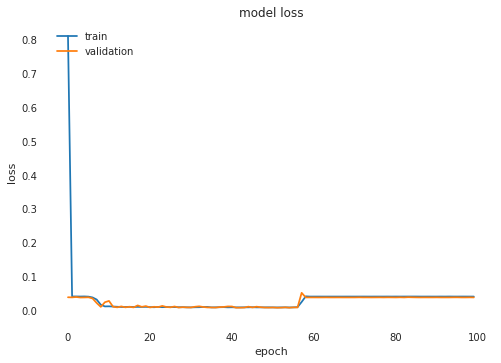

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

<center><h2>Project Under Development</h2></center>
<img src="https://cdn1.iconfinder.com/data/icons/construction-220/64/43-512.png" width=100 height=100>
<center><h4>I hope it was helpful!!</h4></center>
